RUN-2 with a different dataset

In [ ]:
#importing all the dependencies
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.simplefilter(action = 'ignore', category = UserWarning)

import itertools
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.metrics import classification_report, f1_score, confusion_matrix

#tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models, Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

print(tf.__version__)

2.15.0


In [ ]:
#MOUNTING THE DRIVE FOR EXTRACTING DATA

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#SETTING THE PATH FOR THE LOCATION OF THE DATA SET

path = 'drive/MyDrive/DATA/ANIMALS/raw-img'

#SETTING UP THE DICTIONARY CONSISTING OF THE IMAGES AND THEIR RESPECTIVE LABELS
data = {'imgpath': [], 'labels': []}

#BUILDING THE FILE NAMES AND THEIR RESPECTIVE CLASSES or LABELS
category = os.listdir(path)
for folder in category:

  folderpath = os.path.join(path, folder)
  filelist = os.listdir(folderpath)
  for file in filelist:
    fpath = os.path.join(folderpath, file)
    data['imgpath'].append(fpath)
    data['labels'].append(folder)

#BUILDING A PANDA DATA FRAME FROM DATA
df = pd.DataFrame(data)

#convert labels to numbers
lb = LabelEncoder()
df['encoded_labels'] = lb.fit_transform(df['labels'])

#DISPLAYING RANDOM FILES WITH THEIR RESPECTIVE LABELS AND ENCODED LABELS
df.sample(n = 15, random_state = 1)

imgpath    labels  \
12845  drive/MyDrive/DATA/ANIMALS/raw-img/pecora/eb34...    pecora   
20075  drive/MyDrive/DATA/ANIMALS/raw-img/cavallo/OIP...   cavallo   
2935   drive/MyDrive/DATA/ANIMALS/raw-img/farfalla/OI...  farfalla   
22194  drive/MyDrive/DATA/ANIMALS/raw-img/gallina/OIP...   gallina   
7540   drive/MyDrive/DATA/ANIMALS/raw-img/ragno/OIP-V...     ragno   
24302  drive/MyDrive/DATA/ANIMALS/raw-img/gallina/104...   gallina   
20159  drive/MyDrive/DATA/ANIMALS/raw-img/cavallo/OIP...   cavallo   
6525   drive/MyDrive/DATA/ANIMALS/raw-img/ragno/OIP-k...     ragno   
11240  drive/MyDrive/DATA/ANIMALS/raw-img/mucca/OIP-6...     mucca   
8214   drive/MyDrive/DATA/ANIMALS/raw-img/ragno/OIP-a...     ragno   
20338  drive/MyDrive/DATA/ANIMALS/raw-img/cavallo/OIP...   cavallo   
18318  drive/MyDrive/DATA/ANIMALS/raw-img/cane/OIP-79...      cane   
1251   drive/MyDrive/DATA/ANIMALS/raw-img/gatto/1469....     gatto   
3373   drive/MyDrive/DATA/ANIMALS/raw-img/farfalla/OI...  farfalla   
5190   drive/MyDrive/DATA/ANIMALS/raw-img/elefante/OI...  elefante   

       encoded_labels  
12845               7  
20075               1  
2935                3  
22194               4  
7540                8  
24302               4  
20159               1  
6525                8  
11240               6  
8214                8  
20338               1  
18318               0  
1251                5  
3373                3  
5190                2

In [ ]:
#SHAPE OF THE DATASET
print("Shape of the dataset: ", df.shape)
print("_______________________________________")
print("Number of null values: ")
print(df.isnull().sum())
print("_______________________________________")
print("Number of unique values: ")
print(df.nunique())

print("---------------------------------------")
print("Number of images per category : ")
print(df.labels.value_counts())

Shape of the dataset:  (26187, 3)
_______________________________________
Number of null values: 
imgpath           0
labels            0
encoded_labels    0
dtype: int64
_______________________________________
Number of unique values: 
imgpath           26187
labels               10
encoded_labels       10
dtype: int64
---------------------------------------
Number of images per category : 
cane          4863
ragno         4829
gallina       3098
cavallo       2623
farfalla      2112
mucca         1866
scoiattolo    1862
pecora        1820
gatto         1668
elefante      1446
Name: labels, dtype: int64


In [ ]:
#split data into traning and test data
'''
TOTAL ITEMS : 26187 images
SPLITTING THE DATA AS FOLLOWS:
  1. TRAINING DATA : 80% of the DATASET ( 20949 images )
  2. VALIDATION DATA : 12 % of the REMANING DATASET( 3142 images )
  3. TESTING DATA : REAMAING 8 % ( 2096 images )
'''

train_df, Temp_df = train_test_split(df, train_size = 0.80, shuffle = True, random_state = 124)
valid_df, test_df = train_test_split(Temp_df, train_size = 0.60, shuffle = True, random_state = 124)
train_df = train_df.reset_index(drop = True)
valid_df = valid_df.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)

print("----------Train-------------")
print(train_df[["imgpath", "labels"]].head(5))
print(train_df.shape)
print("--------Validation----------")
print(valid_df[["imgpath", "labels"]].head(5))
print(valid_df.shape)
print("----------Test--------------")
print(test_df[["imgpath", "labels"]].head(5))
print(test_df.shape)

----------Train-------------
                                             imgpath      labels
0  drive/MyDrive/DATA/ANIMALS/raw-img/scoiattolo/...  scoiattolo
1  drive/MyDrive/DATA/ANIMALS/raw-img/cane/OIP-w1...        cane
2  drive/MyDrive/DATA/ANIMALS/raw-img/gallina/OIP...     gallina
3  drive/MyDrive/DATA/ANIMALS/raw-img/elefante/ea...    elefante
4  drive/MyDrive/DATA/ANIMALS/raw-img/cane/OIP-l8...        cane
(20949, 3)
--------Validation----------
                                             imgpath      labels
0  drive/MyDrive/DATA/ANIMALS/raw-img/gallina/481...     gallina
1  drive/MyDrive/DATA/ANIMALS/raw-img/cane/OIP-QQ...        cane
2  drive/MyDrive/DATA/ANIMALS/raw-img/cavallo/OIP...     cavallo
3  drive/MyDrive/DATA/ANIMALS/raw-img/cane/OIP-ic...        cane
4  drive/MyDrive/DATA/ANIMALS/raw-img/scoiattolo/...  scoiattolo
(3142, 3)
----------Test--------------
                                             imgpath      labels
0  drive/MyDrive/DATA/ANIMALS/raw-img/cane/OIP-

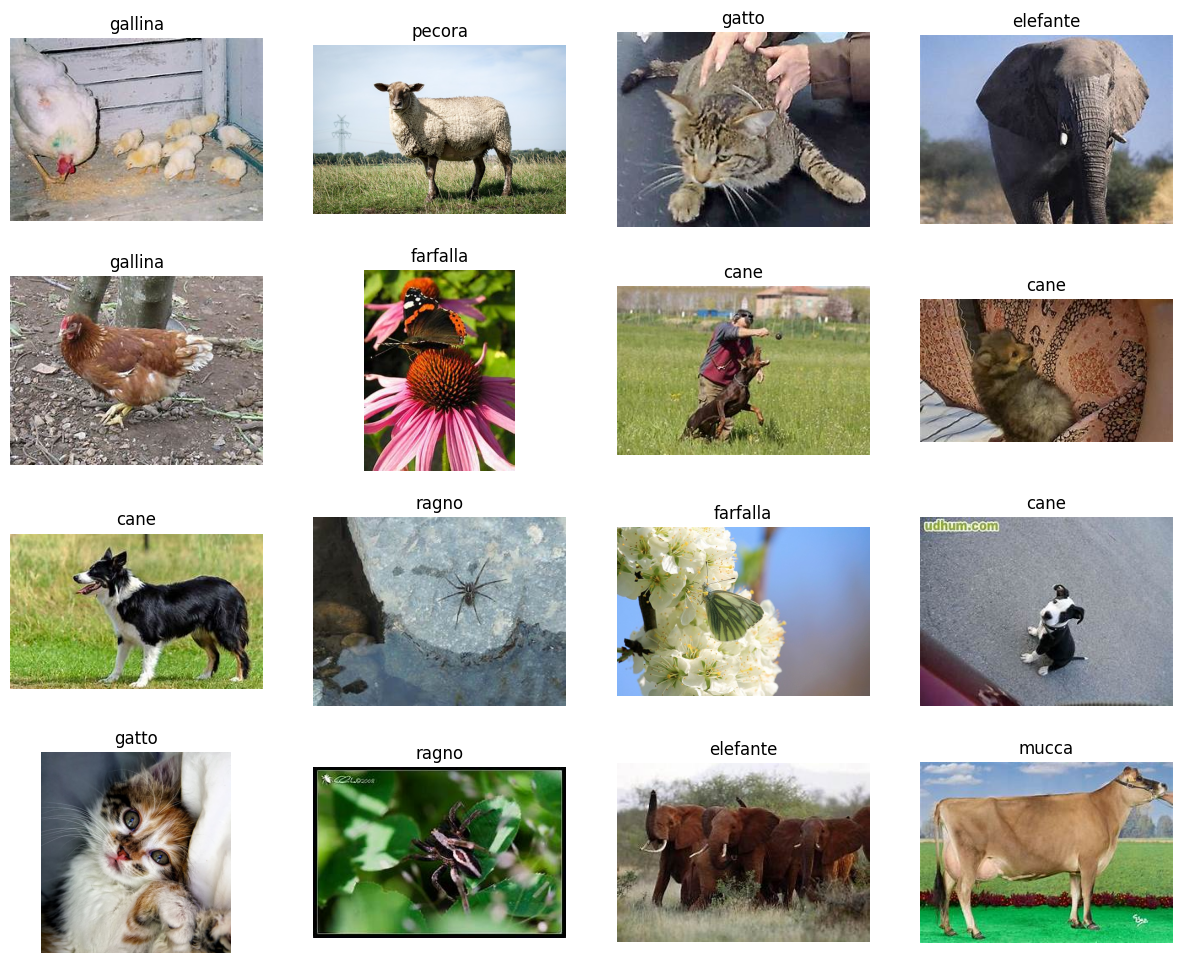

In [ ]:
#SHOWING SAMPLE DATA USING MATPLOTLIB LIBRARY IN Python
plt.figure(figsize = (15, 12))
for i, row in test_df.sample(n = 16).reset_index().iterrows():
  plt.subplot(4, 4, i + 1)
  image_path = row['imgpath']
  image = Image.open(image_path)
  plt.imshow(image)
  plt.title(row['labels'])
  plt.axis('off')

plt.show()

In [ ]:
#Creating DataLoaders

BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)


#USING IMAGE DATA GENERATOR FROM TENSORFLOW TI BUILD THE DATA GENERATORS FOR SETTING UP THE DATA
generator = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.efficientnet.preprocess_input
)



train_images = generator.flow_from_dataframe(
    dataframe = train_df,
    x_col = 'imgpath',
    y_col = 'labels',
    target_size = IMAGE_SIZE,
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = BATCH_SIZE,
    shuffle = True,
    seed = 42
)

val_images = generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_images = generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 20949 validated image filenames belonging to 10 classes.
Found 3142 validated image filenames belonging to 10 classes.
Found 2096 validated image filenames belonging to 10 classes.


In [ ]:
#MODEL STRUCTURE USING THE PRE-TRAINED MODEL OF EFFICENTNETB2 EXCLUDING THE TOP LAYER

pretrained_model = tf.keras.applications.EfficientNetB2(
    input_shape = (224, 224, 3),
    include_top = False,
    weights = 'imagenet',
    pooling = 'max'
)

#SETTING THE DEFAULT VALUE OF THE MODEL TO FALSE TO START TRAINING
for i, layer in enumerate(pretrained_model.layers):
  pretrained_model.layers[i].trainable = False

31790344/31790344 [==============================] - 0s 0us/step


In [ ]:
#TOTAL NUMBER OF CLASSES IN TOTAL
num_classes = len(set(train_images.classes))

'''
MODEL STRUCTURE :

'''


#data augmentation
augment = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomContrast(0.2),
], name = 'AugmentationLayer')


inputs = layers.Input(shape = (224, 224, 3), name = 'inputLayer')
x = augment(inputs)
pretrained_out = pretrained_model(x, training  = False)
x = layers.Dense(256)(pretrained_out)
x = layers.Activation(activation = 'relu')(x)
x = BatchNormalization()(x)
x = layers.Dropout(0, 4)(x)
x = layers.Dense(num_classes)(x)
outputs = layers.Activation(activation = 'softmax', dtype = tf.float32, name = 'activationLayer')(x)
model = Model(inputs = inputs, outputs = outputs)

model.compile(
    optimizer = Adam(0.00001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 AugmentationLayer (Sequent  (None, 224, 224, 3)       0         
 ial)                                                            
                                                                 
 efficientnetb2 (Functional  (None, 1408)              7768569   
 )                                                               
                                                                 
 dense (Dense)               (None, 256)               360704    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024  

In [ ]:


#training :Transfer Learning

history = model.fit(
    train_images,
    steps_per_epoch = len(train_images),
    validation_data = val_images,
    validation_steps = len(val_images),
    epochs = 10,
    callbacks = [
        EarlyStopping(monitor = 'val_loss',
                      patience = 5,
                      restore_best_weights = True),
        ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 2, mode = 'min')
    ]
)
# model.save_weights('drive/MyDrive/PROJECT/MODELS/animals.h5')
# model.save('drive/MyDrive/PROJECT/MODELS/animals.h5')

Epoch 1/10
328/655 [==============>...............] - ETA: 1:25:19 - loss: 1.8136 - accuracy: 0.4137

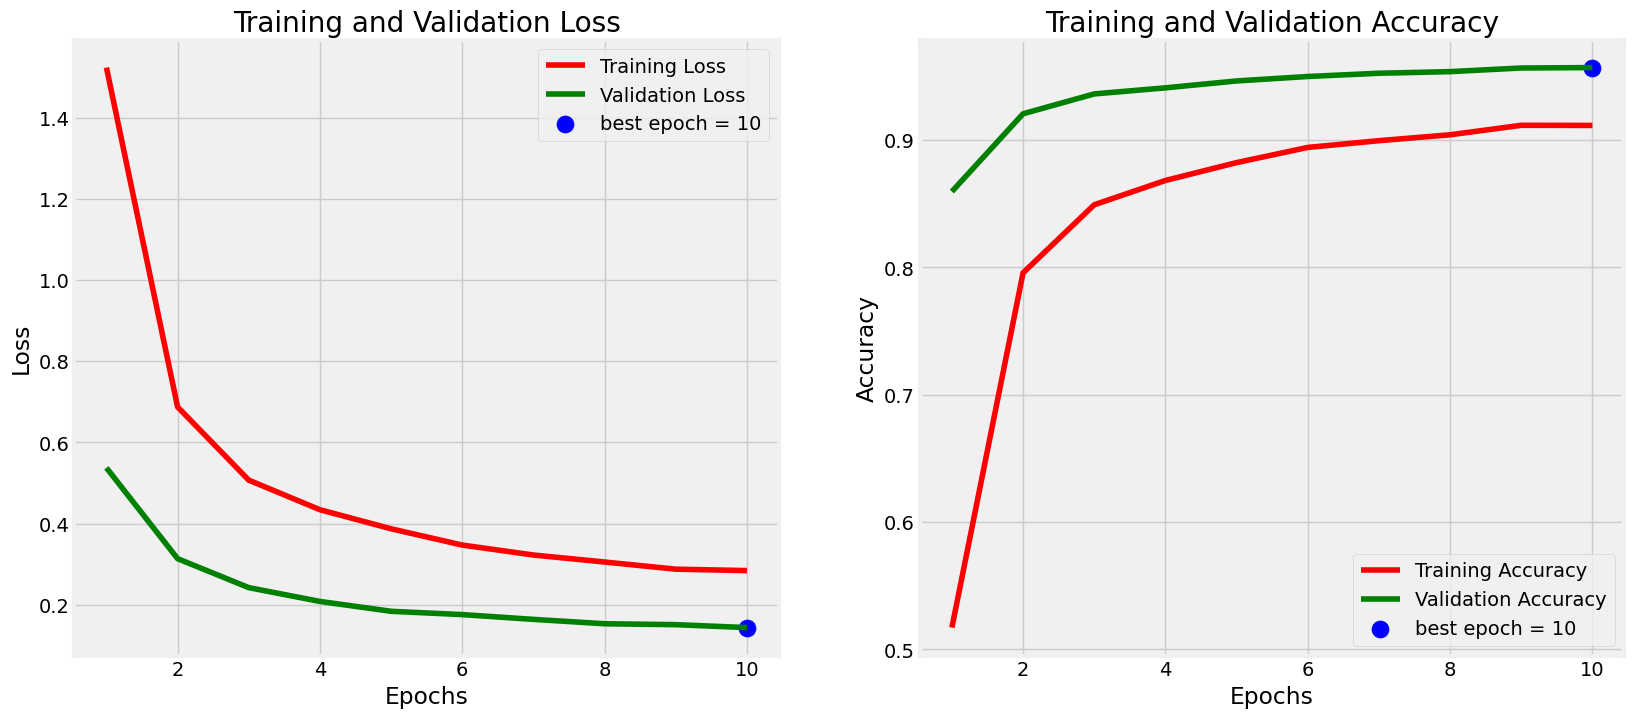

In [ ]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'best epoch = {str(index_loss + 1)}'
acc_label = f'best epoch = {str(index_acc + 1)}'

plt.figure(figsize = (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label = 'Training Loss')
plt.plot(Epochs, val_loss, 'g', label = 'Validation Loss')
plt.scatter(index_loss + 1, val_lowest, s = 150, c = 'blue', label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
model.save('drive/MyDrive/PROJECT/MODELS/animals.h5')
model.save('drive/MyDrive/PROJECT/MODELS/animals')

results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.12236
Test Accuracy: 96.23%


In [ ]:
y_true = test_images.classes
y_pred = np.argmax(model.predict(test_images), axis = 1)
f1 = f1_score(y_true, y_pred, average='macro')
print("F1 Score:", f1)
print(classification_report(y_true, y_pred, target_names=test_images.class_indices.keys()))

66/66 [==============================] - 13s 161ms/step
F1 Score: 0.958267058387929
              precision    recall  f1-score   support

        cane       0.94      0.96      0.95       403
     cavallo       0.94      0.96      0.95       200
    elefante       0.95      0.98      0.97       113
    farfalla       0.96      0.96      0.96       166
     gallina       0.99      0.96      0.98       268
       gatto       0.96      0.94      0.95       137
       mucca       0.92      0.93      0.93       141
      pecora       0.95      0.91      0.93       137
       ragno       0.99      0.99      0.99       394
  scoiattolo       0.98      0.98      0.98       137

    accuracy                           0.96      2096
   macro avg       0.96      0.96      0.96      2096
weighted avg       0.96      0.96      0.96      2096



In [ ]:
classes = dict(zip(test_images.class_indices.values(), test_images.class_indices.keys()))
Predictions = pd.DataFrame({"Image Index" : list(range(len(test_images.labels))),
                            "Test Labels" : test_images.labels,
                            "Test Classes" : [classes[i] for i in test_images.labels],
                            "Prediction Labels" : y_pred,
                            "Prediction Classes" : [classes[i] for i in y_pred],
                            "Path": test_images.filenames,
                            "Prediction Probability" : [x for x in np.asarray(tf.reduce_max(model.predict(test_images), axis = 1))]
                           })
Predictions.head(8)

66/66 [==============================] - 10s 149ms/step


Image Index  Test Labels Test Classes  Prediction Labels  \
0            0            0         cane                  0   
1            1            4      gallina                  4   
2            2            5        gatto                  5   
3            3            9   scoiattolo                  9   
4            4            7       pecora                  7   
5            5            6        mucca                  6   
6            6            1      cavallo                  1   
7            7            4      gallina                  4   

  Prediction Classes                                               Path  \
0               cane  drive/MyDrive/DATA/ANIMALS/raw-img/cane/OIP-ti...   
1            gallina  drive/MyDrive/DATA/ANIMALS/raw-img/gallina/OIP...   
2              gatto  drive/MyDrive/DATA/ANIMALS/raw-img/gatto/1244....   
3         scoiattolo  drive/MyDrive/DATA/ANIMALS/raw-img/scoiattolo/...   
4             pecora  drive/MyDrive/DATA/ANIMALS/raw-img/pecora/OIP-...   
5              mucca  drive/MyDrive/DATA/ANIMALS/raw-img/mucca/OIP-e...   
6            cavallo  drive/MyDrive/DATA/ANIMALS/raw-img/cavallo/OIP...   
7            gallina  drive/MyDrive/DATA/ANIMALS/raw-img/gallina/OIP...   

   Prediction Probability  
0                0.998337  
1                0.999655  
2                0.998224  
3                0.998140  
4                0.980144  
5                0.998498  
6                0.997925  
7                0.999846

from matplotlib import pyplot as plt
_df_0['Image Index'].plot(kind='hist', bins=20, title='Image Index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Test Labels'].plot(kind='hist', bins=20, title='Test Labels')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Prediction Labels'].plot(kind='hist', bins=20, title='Prediction Labels')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Prediction Probability'].plot(kind='hist', bins=20, title='Prediction Probability')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Test Classes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Prediction Classes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Path').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Image Index', y='Test Labels', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Test Labels', y='Prediction Labels', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Prediction Labels', y='Prediction Probability', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Image Index']
  ys = series['Test Labels']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Image Index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Test Classes')):
  _plot_series(series, series_name, i)
  fig.legend(title='Test Classes', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Image Index')
_ = plt.ylabel('Test Labels')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Image Index']
  ys = series['Test Labels']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Image Index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Prediction Classes')):
  _plot_series(series, series_name, i)
  fig.legend(title='Prediction Classes', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Image Index')
_ = plt.ylabel('Test Labels')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Image Index']
  ys = series['Test Labels']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Image Index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Path')):
  _plot_series(series, series_name, i)
  fig.legend(title='Path', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Image Index')
_ = plt.ylabel('Test Labels')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Image Index']
  ys = series['Prediction Labels']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Image Index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Test Classes')):
  _plot_series(series, series_name, i)
  fig.legend(title='Test Classes', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Image Index')
_ = plt.ylabel('Prediction Labels')

from matplotlib import pyplot as plt
_df_14['Image Index'].plot(kind='line', figsize=(8, 4), title='Image Index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Test Labels'].plot(kind='line', figsize=(8, 4), title='Test Labels')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Prediction Labels'].plot(kind='line', figsize=(8, 4), title='Prediction Labels')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Prediction Probability'].plot(kind='line', figsize=(8, 4), title='Prediction Probability')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Prediction Classes'].value_counts()
    for x_label, grp in _df_18.groupby('Test Classes')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Test Classes')
_ = plt.ylabel('Prediction Classes')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Path'].value_counts()
    for x_label, grp in _df_19.groupby('Prediction Classes')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Prediction Classes')
_ = plt.ylabel('Path')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Test Classes'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Image Index', y='Test Classes', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Prediction Classes'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='Image Index', y='Prediction Classes', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Path'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='Image Index', y='Path', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['Test Classes'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='Test Labels', y='Test Classes', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

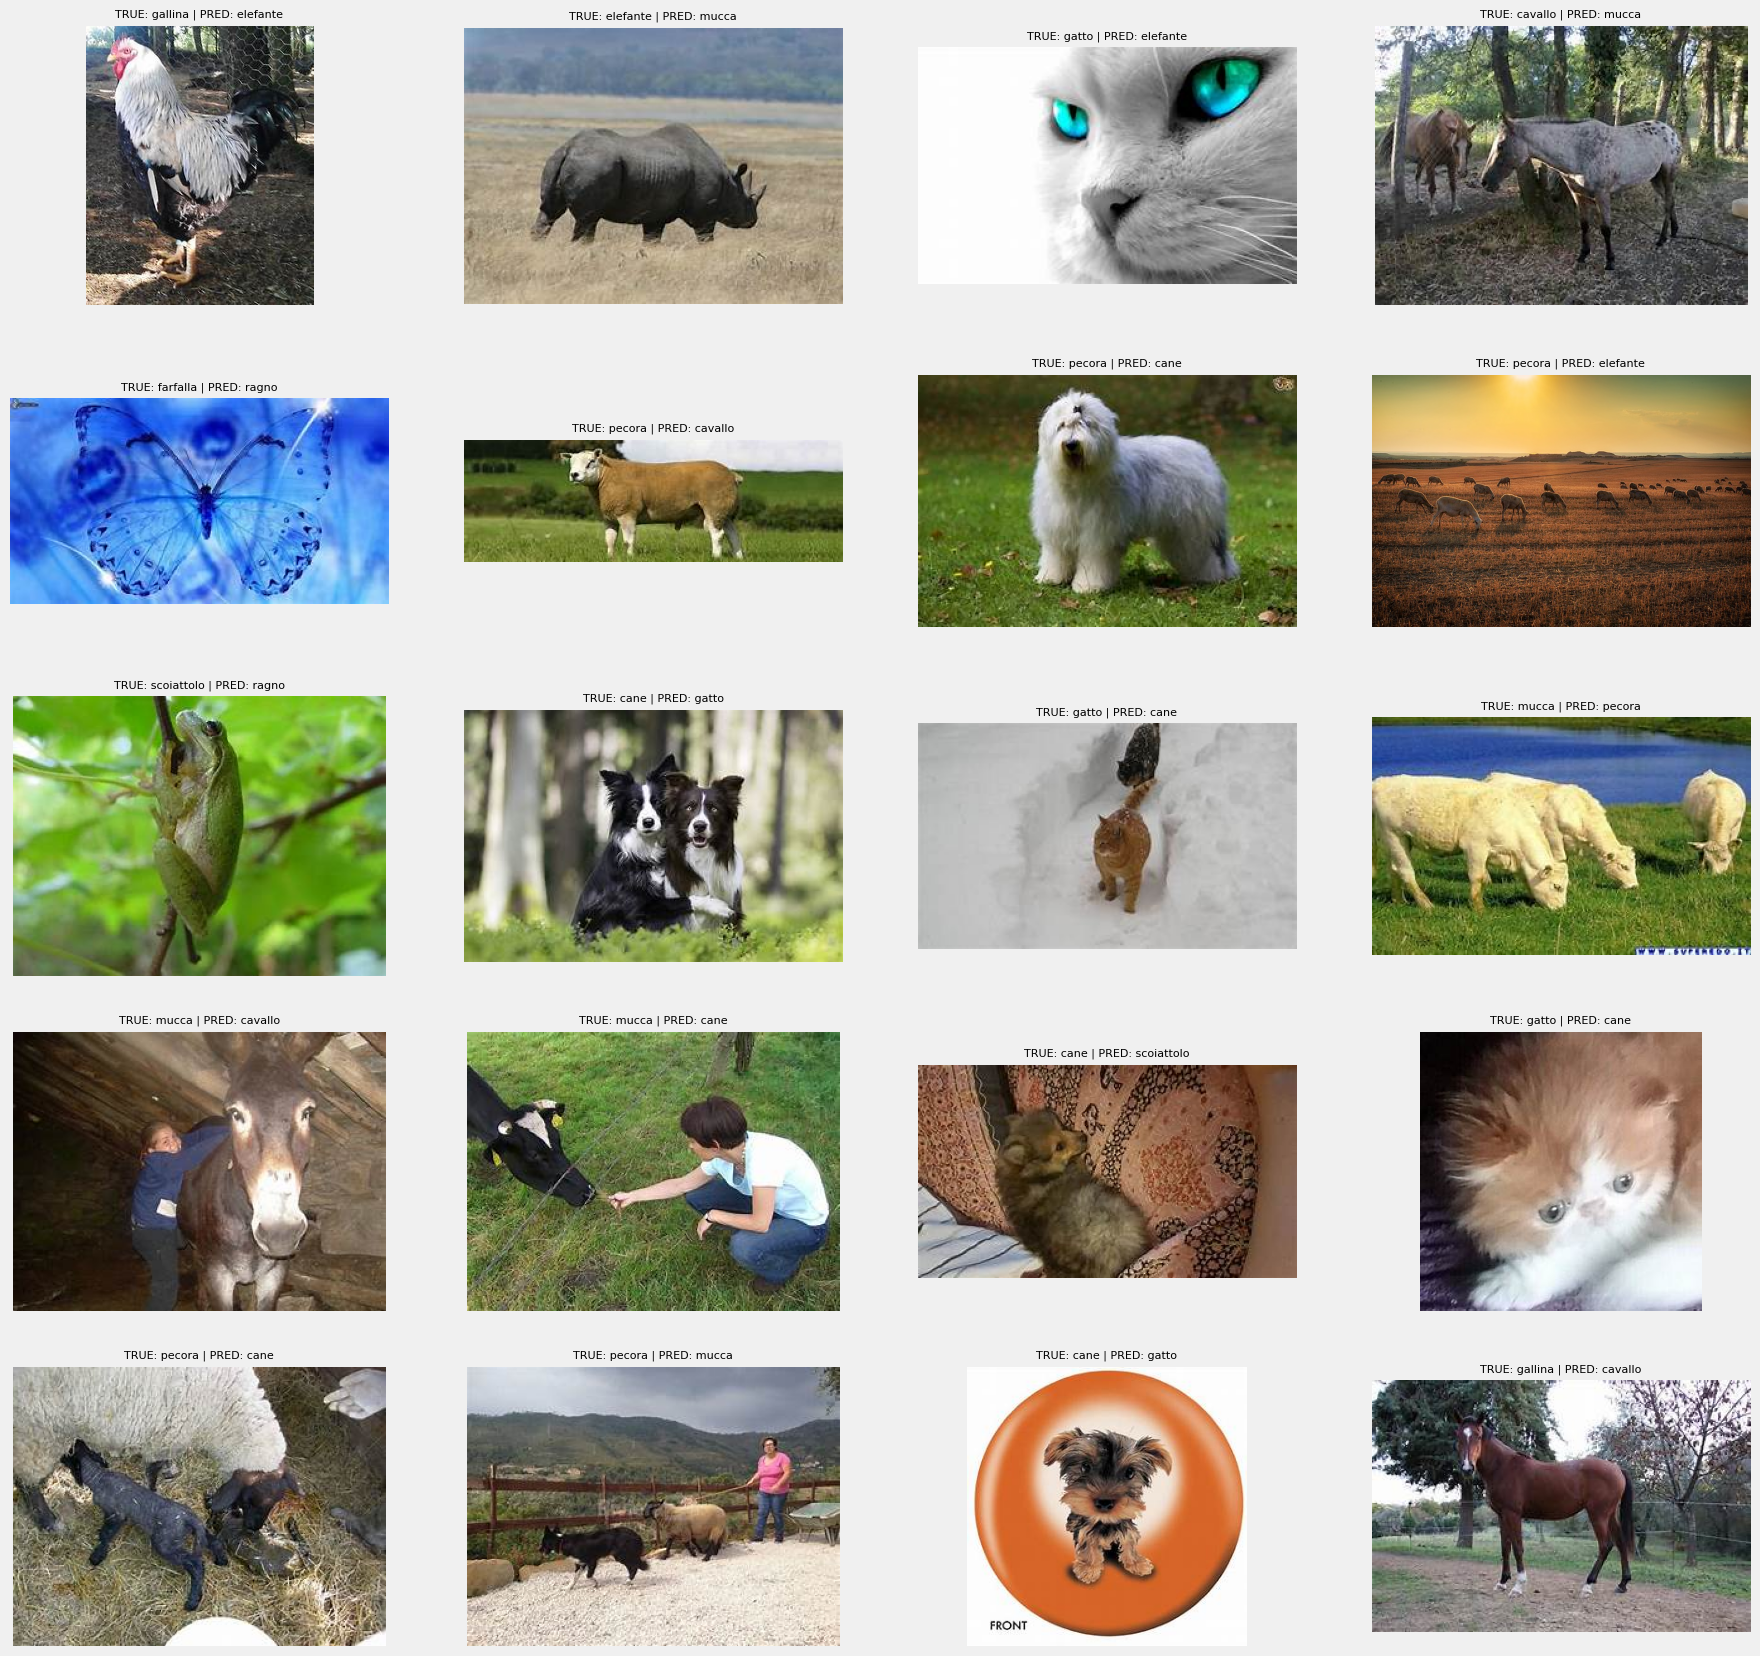

In [ ]:
plt.figure(figsize=(20,20))
for i, row in Predictions[Predictions["Test Labels"] != Predictions["Prediction Labels"]].sort_values("Prediction Probability").tail(20).reset_index().iterrows():
    plt.subplot(5,4,i+1)
    image_path = row['Path']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f'TRUE: {row["Test Classes"]} | PRED: {row["Prediction Classes"]}', fontsize=8)
    plt.axis('off')

plt.show()

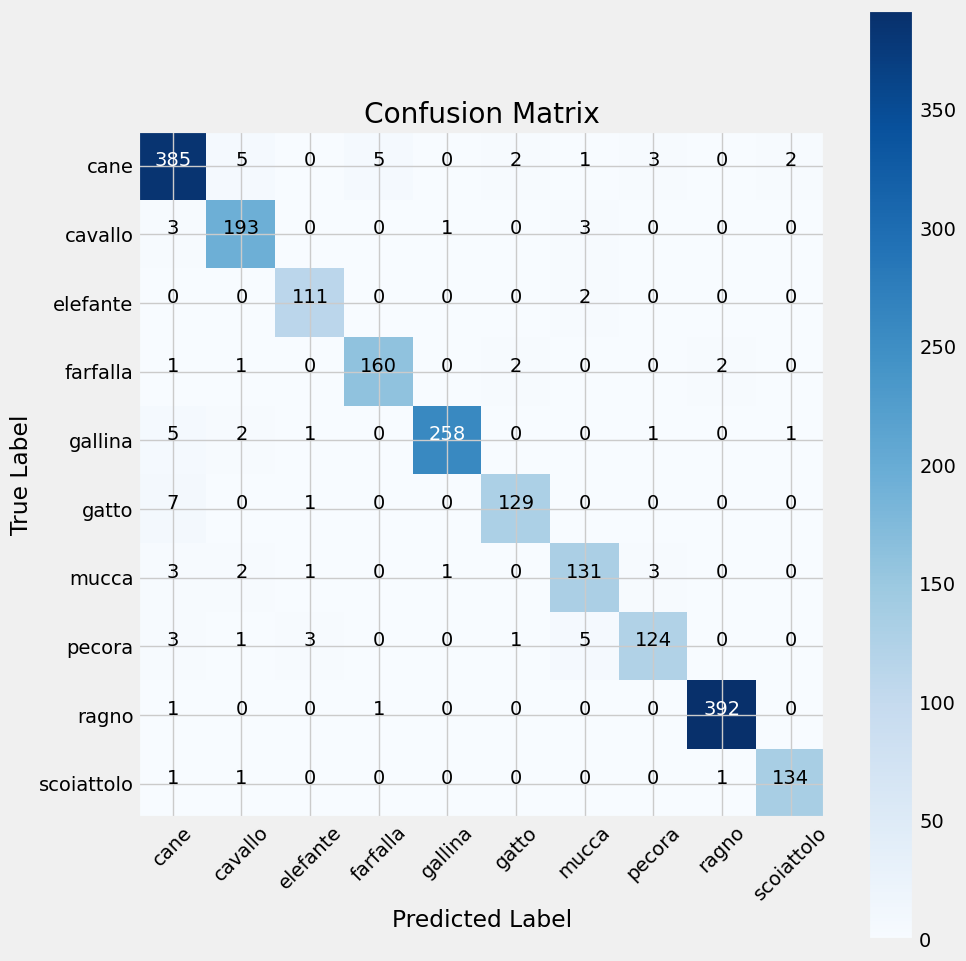

In [ ]:
preds = model.predict_generator(test_images)
y_pred = np.argmax(preds, axis=1)
g_dict = test_images.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_images.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
def predict_single_image(image_path, model):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    # Make predictions
    predictions = model.predict(img_array)

    # Assuming `test_images.class_indices` is available
    classes = {v: k for k, v in test_images.class_indices.items()}

    # Get the predicted class label
    predicted_label = classes[np.argmax(predictions)]

    # Get the predicted probability
    predicted_probability = np.max(predictions)

    return predicted_label, predicted_probability

# Example usage
image_path = "drive/MyDrive/DATA/animals/inf/dog.jpg"  # Change this to the path of your image
predicted_label, predicted_probability = predict_single_image(image_path, model)
print("Predicted Label:", predicted_label)
print("Predicted Probability:", predicted_probability)

FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/DATA/animals/inf/dog.jpg'

In [ ]:
model = tf.keras.models.load_model('drive/MyDrive/PROJECT/MODELS/animals.h5')


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 AugmentationLayer (Sequent  (None, None, None, None   0         
 ial)                        )                                   
                                                                 
 efficientnetb2 (Functional  (None, 1408)              7768569   
 )                                                               
                                                                 
 dense (Dense)               (None, 256)               360704    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024  

1/1 [==============================] - 0s 30ms/step
Predicted Label: scoiattolo
Predicted Probability: 0.99968445


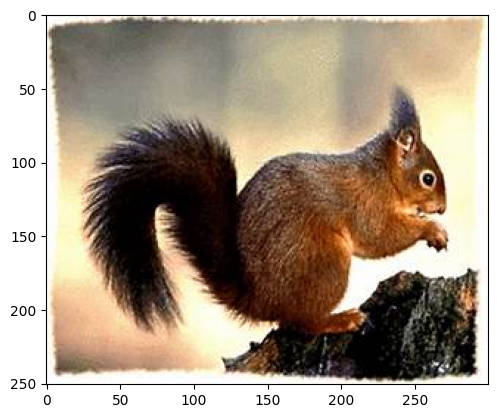

In [ ]:
#FINAL CODE FOR EXPORT
def predict_single_image(image_path, model):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    # Make predictions
    predictions = model.predict(img_array)

    # Assuming `test_images.class_indices` is available
    #classes = {v: k for k, v in test_images.class_indices.items()}
    classes = {v: k for k, v in tc.items()}

    # Get the predicted class label
    predicted_label = classes[np.argmax(predictions)]

    # Get the predicted probability
    predicted_probability = np.max(predictions)

    return predicted_label, predicted_probability

# Example usage

tc = {
    'cane' : 0,
    'cavallo' : 1,
    'elefante' : 2,
    'farfalla' : 3,
    'gallina' : 4,
    'gatto' : 5,
    'mucca' : 6,
    'pecora' : 7,
    'ragno' : 8,
    'scoiattolo' : 9

}

image_path = "drive/MyDrive/PROJECT/TEST/scoiattolo.jpeg"  # Change this to the path of your image
predicted_label, predicted_probability = predict_single_image(image_path, model)
print("Predicted Label:", predicted_label)
print("Predicted Probability:", predicted_probability)

plt.plot(5,4)
image = Image.open(image_path)
plt.imshow(image)
plt.show()

